# Project 2: Investigatin a Dataset

### Haleh Dolati

For this project I chose the Titanic dataset. I'm going to use pandas, matplot, and numpy to examine the data and answer the questions. From analyzing this dataset, I would like to know Which factors made people more likely to survive? is it their gender? their their age? or a combination of them? 

In [1]:
import numpy as np
import pandas as pd

Titanic= pd.read_csv('Titanic-data.csv')
Titanic [:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


The next step is to check the data types and look at some basic statistics:

In [2]:
print Titanic.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# set the precision to 3 decimal points
pd.set_option('precision',3)

Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [4]:
# Check the null values
pd.isnull(Titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Three columns have null values: Age, Cabin, and Ebmarked. Cabin is the cabin number and Embarked is the boarding port, which I'm not going to use these two in this analysis.
But I'm going to use the age of the passengers in my analysis.

# Interesting facts: 
I would like to know who were the youngest and oldest passengers and survivors:

In [5]:
def reverse_name(name):
    split_name=name.split(",")
    fname=split_name[0]
    lname=split_name[1]
    return lname + " " +fname

In [6]:
# total number of passengers:

oldestid= Titanic.Age.argmax()
youngestid=Titanic.Age.argmin()
print 'There were' , Titanic.PassengerId.nunique() ,'passengers on-board.'

print 'The oldest passenger was'+ reverse_name(Titanic.Name[oldestid]) + ' & the youngest one was'+ reverse_name(Titanic.Name[youngestid])+ '.'



There were 891 passengers on-board.
The oldest passenger was Mr. Algernon Henry Wilson Barkworth & the youngest one was Master. Assad Alexander Thomas.


# What factors made people more likely to survive?
First I would like to see what percent of passengers survived, then I want to know the survivorship by Age, Gender, and Class of their cabin. 

### Total Survaivorship: 


In [7]:
print 'Only', str(round(Titanic.Survived.mean(), 4)*100) + '% of Titanic\'s passengers survived the accident.'

Only 38.38% of Titanic's passengers survived the accident.


In [8]:
# Survived_Passengers= Titanic['Survived']

The next step is to find out how different variables affected the survivorship. The process to calculate the percentage of survived passenger based on each variable is:
1-	Group that variable based on common values of data points. For example the ‘sex’ variable will be grouped based on ‘male’ and ‘female’ values. I’m going to use groupby() function.
2-	The next step is to calculate the number of people who survived the crash in each group and the total number of passenger.
3-	And the final step is to calculate the survivorship.
I'm going to write a function for this process.

In [9]:
def Passenger_Group (data, variable):
    Passenger_Group_by_variable = data.groupby(variable)
    num_survided = Passenger_Group_by_variable ['Survived'].sum()
    count_Group = Passenger_Group_by_variable ['PassengerId'].count()
    group_survived =(num_survided/count_Group)*100
    return group_survived , num_survided, count_Group


### Survaivorship by Gender


In [10]:
FM_survived , num_FM_survided, count_FM_Group = Passenger_Group (Titanic, ['Sex'])
print 'Percent of female and male passenger who survived:' 
print FM_survived

Percent of female and male passenger who survived:
Sex
female    74.204
male      18.891
dtype: float64


Populating the interactive namespace from numpy and matplotlib


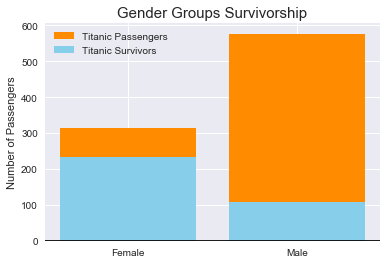

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
% pylab inline
index = [1,2]
plt.bar(index, count_FM_Group, color = 'darkorange', label = "Titanic Passengers" )
plt.bar(index, num_FM_survided, color = 'skyblue', label = "Titanic Survivors")
plt.axhline(color = 'black')
plt.xticks([1, 2], ['Female', 'Male'])
plt.ylabel('Number of Passengers')
plt.title("Gender Groups Survivorship", size=15)
plt.legend(loc='upper left')
plt.show()


Almost 75% of women survived the crash while male passengers survival rate was less than 19%. The chart visualizes this huge difference.

### Survaivalship by Age

In order to calculate the survivorship by age, first I have to categorize the data. I used the "bins" in Pandas to do it. My first step was to determine the categories that I wanted to see the survivorship. 
Since I was interested to see this rate specifically for children under the age 10 and older than 65, I chose 4 categories with unequal intervals: 
Children: 0-10 
Young Adults: 10-18 
Adults: 18-65 
Elderlies: 65-100

In [12]:
bins = [0, 10, 18, 65, 100]
group_names= ['Children', 'Young_Adults', 'Adults', 'Elderlies']
AgeGroup = pd.cut(Titanic['Age'], bins, labels=group_names)
Titanic['AgeGroup'] = pd.cut(Titanic['Age'], bins, labels=group_names)

pd.value_counts(Titanic['AgeGroup'])


Adults          567
Young_Adults     75
Children         64
Elderlies         8
Name: AgeGroup, dtype: int64

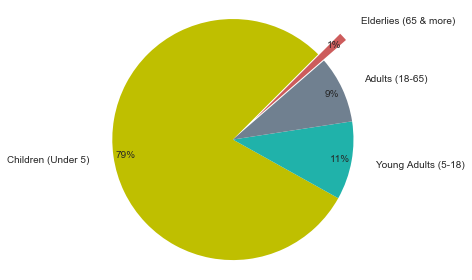

In [13]:
colors_p = ["y", "lightseagreen", "slategrey", "indianred"]
plt.pie(
    pd.value_counts(Titanic['AgeGroup']),labels=['Children (Under 5)', 'Young Adults (5-18)', 'Adults (18-65)', 'Elderlies (65 & more)'],
    colors=colors_p,explode=(0, 0, 0, 0.25),startangle=45,autopct='%1.0f%%',pctdistance=0.9, labeldistance=1.2)
plt.axis('equal')

plt.tight_layout()
plt.show()


Now it shows which age group each passenger will fall in. The majority of passengers were between age 18-65 and there were only 8 passengers older than 65 years old. The next step in to find out which age group had the highest survival rate.

In [14]:
age_survived , num_age_survided, count_age_Group = Passenger_Group (Titanic, ['AgeGroup'])
print 'Percent of children, young adults, adults, and ederlies who survived:'
print age_survived

# print Passenger_Group (Titanic, ['AgeGroup'])

Percent of children, young adults, adults, and ederlies who survived:
AgeGroup
Children        59.375
Young_Adults    42.667
Adults          38.624
Elderlies       12.500
dtype: float64


Populating the interactive namespace from numpy and matplotlib


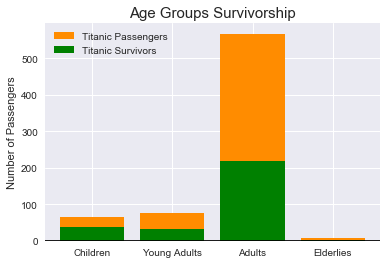

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
% pylab inline
index = [1,2,3,4]
plt.bar(index, count_age_Group, color = 'darkorange', label = "Titanic Passengers" )
plt.bar(index, num_age_survided, color = 'green', label = "Titanic Survivors")
plt.axhline(color = 'black')
plt.xticks([1, 2, 3, 4], ['Children', 'Young Adults', 'Adults', 'Elderlies'])
plt.title("Age Groups Survivorship", size=15)
plt.ylabel('Number of Passengers')
plt.legend(loc='upper left')
plt.show()


Surprisingly, children and young adults were more likely to survive the crash. It might be because of the help that they received from the adults. Also only 1 passenger above the age 65 survived. 
This chart shows the number of survived passenger in each age group compare to the total number of passengers in that age group.

### Survaivalship by Cabin Class

In [16]:
print'Percent of survivors based on their cabin class:'
print Passenger_Group (Titanic, ['Pclass'])

Percent of survivors based on their cabin class:
(Pclass
1    62.963
2    47.283
3    24.236
dtype: float64, Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64, Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64)


More than 60% of first class passengers survived while less than 25% of third class passengers were able to scape. Now my question is:
What about male and female passengers in each class? I saw majority of the female passengers survived but is this same of different classes?

#### Survaivalship by Gender Based on Cabin's Class

In [17]:
Surv_Gender_Class = Titanic.groupby(['Pclass', 'Sex'])
print "Percent of female and male passenger who survived based on their cabin class:" 
print(Surv_Gender_Class['Survived'].sum()/ Surv_Gender_Class['PassengerId'].count())*100

Percent of female and male passenger who survived based on their cabin class:
Pclass  Sex   
1       female    96.809
        male      36.885
2       female    92.105
        male      15.741
3       female    50.000
        male      13.545
dtype: float64


Populating the interactive namespace from numpy and matplotlib


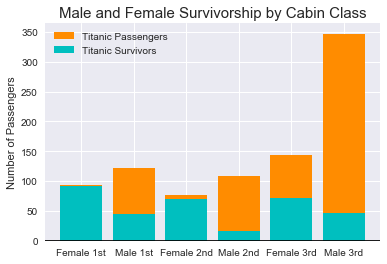

In [18]:
num_FM_class_survided = Surv_Gender_Class ['Survived'].sum()
count_FM_class_Group = Surv_Gender_Class ['PassengerId'].count()


import matplotlib.pyplot as plt
import seaborn as sns
% pylab inline
index = [1,2,3,4,5,6]
plt.bar(index, count_FM_class_Group, color = 'darkorange', label = "Titanic Passengers" )

plt.bar(index, num_FM_class_survided, color = 'c', label = "Titanic Survivors")
plt.axhline(color = 'black')
plt.xticks([1, 2,3,4,5,6], ['Female 1st', 'Male 1st', 'Female 2nd', 'Male 2nd', 'Female 3rd', 'Male 3rd'])
plt.title("Male and Female Survivorship by Cabin Class", size=15)
plt.legend(loc='upper left')
plt.ylabel('Number of Passengers')
plt.show()



The answer to my question regarding gender and cabin class is yes! In all classes, female passengers survivors were more than male ones. However there is a huge difference between the first class and the third class female survivorship: while almost all female passengers in the first class survived, only half of the third class one were able to scape.  

***
### <span style="color:green"> Conclusions:</span>
In this analysis I looked into the factors that make passengers more likely to survive the Titanic crash. Based on the dataset that I had, I chose sex, class, and age to focus on. Here is the summary of what I found analyzing this data set:

* ###### The groups of passengers who were most likely to survive in 1D analysis were:
    * Female Passengers: 74%
    * First class Passengers: 63% 
    * Children under age of 5 years old: 59%

* ###### The groups of passengers who were most likely to survive in 2D analysis were:
    * Female Passengers in first class cabins: 97%
    * Female Passengers in second-class cabins: 92%

---
### <span style="color:green"> Limitations:</span>
The very first problem with this data set is the fact his is not the whole population. The total number of passengers on the Titanic was 2,240 souls, which makes this dataset a sample dataset. In order to generalized the results of my analysis I need to have some info about the population and take advantage of statistical tests. 
Another limitation was the missing values in passengers' age. I excluded those data points wherever I used age as a variable.

--- 
### <span style="color:green"> Possible future analysis:</span>
I would like to see the survivorship based on race and nationality.

---


http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html

http://stackoverflow.com/questions/20457038/python-how-to-round-down-to-2-decimals

https://chrisalbon.com/python/pandas_binning_data.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html#pandas.DataFrame.query

http://pandas.pydata.org/pandas-docs/stable/indexing.html#the-query-method-experimental

http://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.tick_params.html

http://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot

http://www.history.com/topics/titanic

http://matplotlib.org/examples/color/named_colors.html